**Imports**

In [1]:
import csv
import itertools
import matplotlib.pyplot as plt
import matplotlib_venn as venn
import mpld3
import networkx as nx
import numpy as np
import scipy as sp
import seaborn as sns
import statistics

In [2]:
def edge_creator(sighting_group):
    sighting_group.sort()
    edges = [pair for pair in itertools.combinations(sighting_group, 2)]
    return edges

**Importing Overall Network**

In [3]:
with open('C:/Users/Liam/Documents/DataMasters/MD2Networks/originalData/all_orig.csv',
          'r') as fid:
    all_orig_text = fid.read()
    
lines = all_orig_text.split('\n')
lines = [line.split(",")[1:len(line.split(","))] for line in lines]
display(f"The overall network is built from {len(lines)} sightings")


overall_edge_list = [edge for line in lines for edge in edge_creator(line)]
overall_edge_list = list(set(overall_edge_list))


GrAll = nx.Graph() 
for (x, y) in overall_edge_list:
    GrAll.add_node(x)
    GrAll.add_node(y)
    GrAll.add_edge(x, y)
    

display(f"GrAll has {GrAll.number_of_nodes()} nodes")
display(f"GrAll has {GrAll.number_of_edges()} edges")

'The overall network is built from 321 sightings'

'GrAll has 291 nodes'

'GrAll has 3182 edges'

In [4]:
dolphins = [node for node in GrAll.nodes]
#print(dolphins)
print(len(dolphins))

291


291


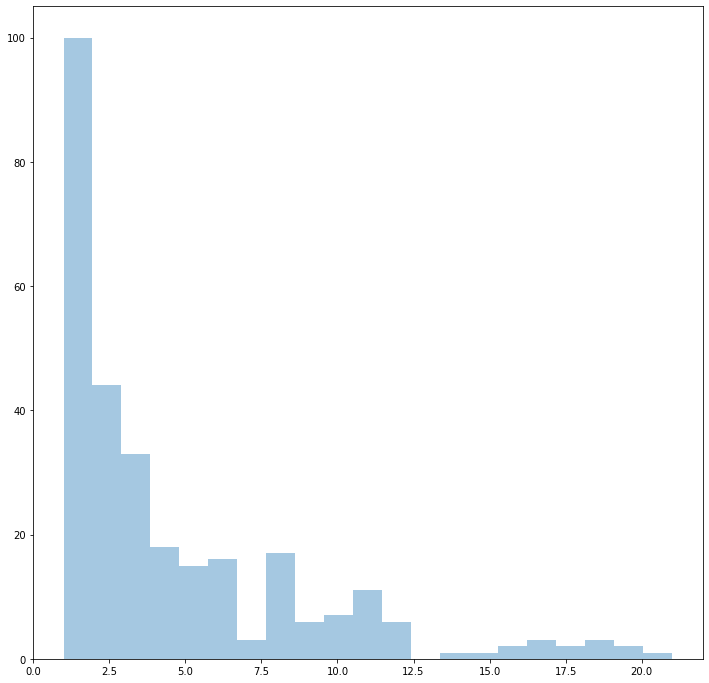

In [5]:
dolphins_seen = []

for line in lines:
    dolphins_seen = dolphins_seen + line
    
dolphin_count = [(dolphins_seen.count(dolphin), dolphin) for dolphin in dolphins]
dolphin_count_dict = {dolphin:dolphins_seen.count(dolphin) for dolphin in dolphins}

dolphin_count.sort(reverse = True)
max_count = max(dolphin_count)

dolphin_count_numbers, dolphin_count_dolpings = zip(*dolphin_count)

print(len(dolphin_count_numbers))


plt.figure(3,figsize=(12,12)) 
sns.distplot(dolphin_count_numbers, bins=max(dolphin_count_numbers), hist=True, kde=False, rug=False)

In [6]:
max_count = max(dolphin_count_numbers)
mean_count = statistics.mean(dolphin_count_numbers)
median_count = statistics.median(dolphin_count_numbers)

display(f"GrAll has a maximum count of {max_count}")
display(f"GrAll has a mean count of {mean_count}")
display(f"GrAll has a median count of {median_count}")

# print(dolphin_count_numbers)

'GrAll has a maximum count of 21'

'GrAll has a mean count of 4.364261168384879'

'GrAll has a median count of 3'

**Importing Social Network**

In [7]:
with open('C:/Users/Liam/Documents/DataMasters/MD2Networks/originalData/socialise_orig.csv',
          'r') as fid:
    social_orig_text = fid.read()
    
lines = social_orig_text.split('\n')
lines = [line.split(",")[1:len(line.split(","))] for line in lines]
display(f"The social network is built from {len(lines)} sightings")


social_edge_list = [edge for line in lines for edge in edge_creator(line)]
social_edge_list = list(set(social_edge_list))


GrSocial = nx.Graph() 
for (x, y) in social_edge_list:
    GrSocial.add_node(x)
    GrSocial.add_node(y)
    GrSocial.add_edge(x, y)
    

display(f"GrSocial has {GrSocial.number_of_nodes()} nodes")
display(f"GrSocial has {GrSocial.number_of_edges()} edges")

'The social network is built from 40 sightings'

'GrSocial has 151 nodes'

'GrSocial has 1554 edges'

**Importing Forage Network**

In [8]:
with open('C:/Users/Liam/Documents/DataMasters/MD2Networks/originalData/forage_orig.csv',
          'r') as fid:
    forage_orig_text = fid.read()
    
lines = forage_orig_text.split('\n')
lines = [line.split(",")[1:len(line.split(","))] for line in lines]
display(f"The forage network is built from {len(lines)} sightings")


forage_edge_list = [edge for line in lines for edge in edge_creator(line)]
forage_edge_list = list(set(forage_edge_list))


GrForage = nx.Graph() 
for (x, y) in forage_edge_list:
    GrForage.add_node(x)
    GrForage.add_node(y)
    GrForage.add_edge(x, y)
    

display(f"GrForage has {GrForage.number_of_nodes()} nodes")
display(f"GrForage has {GrForage.number_of_edges()} edges")

'The forage network is built from 180 sightings'

'GrForage has 190 nodes'

'GrForage has 1134 edges'

**Importing Travel Network**

In [9]:
with open('C:/Users/Liam/Documents/DataMasters/MD2Networks/originalData/travel_orig.csv',
          'r') as fid:
    travel_orig_text = fid.read()
    
lines = travel_orig_text.split('\n')
lines = [line.split(",")[1:len(line.split(","))] for line in lines]
display(f"The travel network is built from {len(lines)} sightings")


travel_edge_list = [edge for line in lines for edge in edge_creator(line)]
travel_edge_list = list(set(travel_edge_list))


GrTravel = nx.Graph() 
for (x, y) in travel_edge_list:
    GrTravel.add_node(x)
    GrTravel.add_node(y)
    GrTravel.add_edge(x, y)
    

display(f"GrTravel has {GrTravel.number_of_nodes()} nodes")
display(f"GrTravel has {GrTravel.number_of_edges()} edges")

'The travel network is built from 103 sightings'

'GrTravel has 188 nodes'

'GrTravel has 1032 edges'

**Basic Network Metrics**

Overall

In [10]:
no_components_all = nx.number_connected_components(GrAll)
display(no_components_all)

components_all = [len(comp) for comp in nx.connected_components(GrAll)]
display(components_all)

nodes_all = [list(comp) for comp in nx.connected_components(GrAll)]
#print(nodes_all)

main_all = nodes_all[0]
splinter_all = [dolphin for x in range(1,no_components_all)for dolphin in nodes_all[x] ]
print(splinter_all)

# diameter_all = nx.diameter(GrAll)
# print(diameter_all)

# all_connectivity = nx.node_connectivity(GrAll)
# display(all_connectivity)

3

[2, 284, 5]

['UODC', 'MNSC', 'SDCR', 'SOCT', 'GBSC', 'BESC', 'NENK', 'HYSS', 'VGSK', 'CESC', 'GNSK', 'JDSM', 'BEDI', 'AEOS', 'AWWB', 'CISC', 'NNWB', 'BGDI', 'VFIN', 'GISS', 'SESS', 'MISS', 'JYDK', 'MEDI', 'TBWB', 'CSSC', 'U15S', 'SSDI', 'UAOS', 'HNSC', 'MLSC', 'CWSS', 'EXSK', 'NTWB', 'SNCT', 'LWNK', 'BXSM', 'HNOS', 'ANCT', 'SUSS', 'DUWB', 'JINK', 'MRCR', 'TOSC', 'MLSS', 'CASC', 'LSWB', 'U20N', 'HSSC', 'SYNK', 'ERCT', 'NYSC', 'RRWB', 'CPSC', 'SLDI', 'PTSK', 'WTSC', 'GRSC', 'CWSC', 'DROS', 'SDDI', 'SXNK', 'FEWB', 'GESC', 'SESR', 'NHCT', 'PLNC', 'FNCT', 'IMSC', 'SCSC', 'SRWB', 'BNDI', 'BJSC', 'ETNK', 'HROS', 'ORSC', 'ZTWB', 'VTCT', 'THWB', 'TCSS', 'CSSM', 'TMDK', 'PWWB', 'TRSC', 'MHWB', 'TESK', 'EOOS', 'GYOS', 'RXSC', 'BBSK', 'TRSM', 'SYSC', 'IEWB', 'NOSM', 'NSOS', 'BSNC', 'WDDR', 'RKSS', 'SKSM', 'HTWB', 'FRWB', 'WSOS', 'DPSC', 'ORWB', 'PNNC', 'RPSC', 'DHDI', 'CYOS', 'Y10N', 'DENK', 'MTDI', 'BPSK', 'HDSK', 'PESS', 'GLDR', 'STSC', 'NHWB', 'LOSC', 'PPSC', 'U37N', 'STDC', 'KLDI', 'NLSC', 'SHSC', 'SMSC',

In [11]:
GrAllMComp = nx.Graph() 
for (x, y) in overall_edge_list:
    if x not in splinter_all:
        GrAllMComp.add_node(x)
        GrAllMComp.add_node(y)
        GrAllMComp.add_edge(x, y)
    

display(f"GrAllMComp has {GrAllMComp.number_of_nodes()} of GrAll's {GrAll.number_of_nodes()} nodes")
display(f"GrAllMComp has {GrAllMComp.number_of_edges()} of GrAll's {GrAll.number_of_edges()} edges")


diameter_all = nx.diameter(GrAllMComp)
display(f"GrAllMComp has a diameter of {diameter_all}")

radius_all = nx.radius(GrAllMComp)
display(f"GrAllMComp has a radius of {radius_all}")

"GrAllMComp has 2 of GrAll's 291 nodes"

"GrAllMComp has 1 of GrAll's 3182 edges"

'GrAllMComp has a diameter of 1'

'GrAllMComp has a radius of 1'

'GrAll has a maximum degree of 99'

'GrAll has a mean degree of 21.869415807560138'

'GrAll has a median degree of 15'

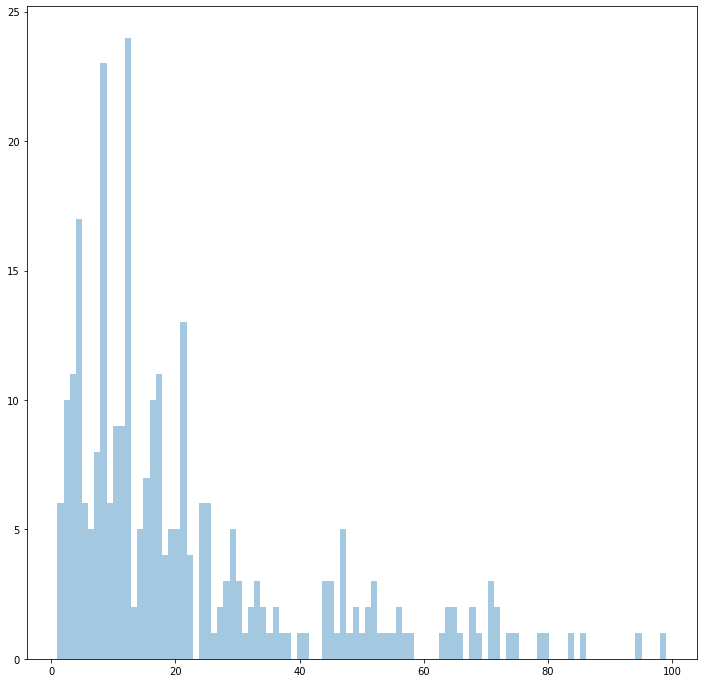

In [12]:
degree_all = [GrAll.degree(dolphin) for dolphin in dolphins]
max_degree_all = max(degree_all)

mean_degree_all = statistics.mean(degree_all)
median_degree_all = statistics.median(degree_all)

display(f"GrAll has a maximum degree of {max_degree_all}")
display(f"GrAll has a mean degree of {mean_degree_all}")
display(f"GrAll has a median degree of {median_degree_all}")
# degree_all.sort()
# print(degree_all)
plt.figure(3,figsize=(12,12)) 
sns.distplot(degree_all, bins=max_degree_all, hist=True, kde=False, rug=False)

103
188


"103 of GrAll's 291 nodes (35.39518900343643%)have a cluster coefficient of 1"

'The graph GrAll has an average cluster coefficient of 0.6823326907114734'

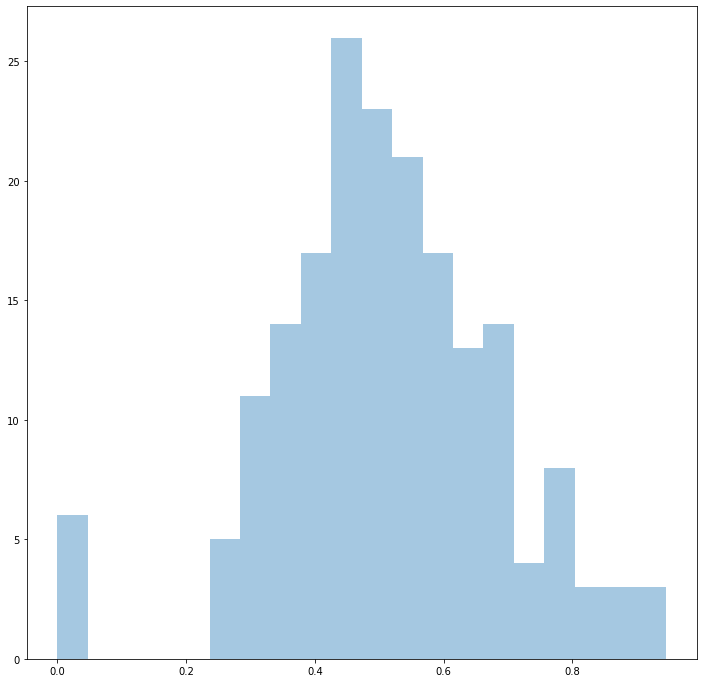

In [13]:
cluster_all = [nx.clustering(GrAll, nodes = dolphin) for dolphin in dolphins]
# print(cluster_all)

i = 0
for x in cluster_all:
    if x == 1:
        i = i+1
print(i)
pct = 100*i/GrAll.number_of_nodes() 

cluster_all_disunity = [coef for coef in cluster_all if coef < 1]
print(len(cluster_all_disunity))

display(f"{i} of GrAll's {GrAll.number_of_nodes()} nodes ({pct}%)have a cluster coefficient of 1")

av_cluster_all = nx.average_clustering(GrAll)

display(f"The graph GrAll has an average cluster coefficient of {av_cluster_all}")

plt.figure(3,figsize=(12,12)) 
sns.distplot(cluster_all_disunity, bins=20, hist=True, kde=False, rug=False)
            

In [14]:
no_clique_all = nx.graph_number_of_cliques(GrAll)
clique_no_all = nx.graph_clique_number(GrAll)

display(f"The graph GrAll has {no_clique_all} cliques, the largest of which contains {clique_no_all} dolphins")

'The graph GrAll has 942 cliques, the largest of which contains 31 dolphins'

In [54]:
tahi = nx.closeness_centrality(GrAll)
#display(tahi)
rua = nx.betweenness_centrality(GrAll, weight = None)
#display(rua)
toru = nx.degree_centrality(GrAll)
#display(toru)

list_closeness = [(tahi[dolphin], dolphin) for dolphin in dolphins]
list_closeness.sort(reverse = True)
list_closeness_dolphins = [list_closeness[x][1] for x in range(0,len(dolphins))]
#display(list_closeness)
#display(list_closeness[0])
rank_closeness = {str(list_closeness[x][1]):x+1 for x in range(0,len(list_closeness))}
#display(rank_closeness)

list_betweenness = [(rua[dolphin], dolphin) for dolphin in dolphins]
list_betweenness.sort(reverse = True)
list_betweenness_dolphins = [list_betweenness[x][1] for x in range(0,len(dolphins))]
rank_betweenness = {str(list_betweenness[x][1]):x+1 for x in range(0,len(list_betweenness))}

list_degree = [(rua[dolphin], dolphin) for dolphin in dolphins]
list_degree.sort(reverse = True)
list_degree_dolphins = [list_degree[x][1] for x in range(0,len(dolphins))]
rank_degree = {str(list_degree[x][1]):x+1 for x in range(0,len(list_degree))}

list_overall = [(rank_closeness[str(dolphin)]
                + rank_betweenness[str(dolphin)]
                + rank_degree[str(dolphin)], 
                 dolphin)
               for dolphin in dolphins]
list_overall.sort()
list_overall_dolphins = [list_overall[x][1] for x in range(0,len(dolphins))]
rank_overall = {str(list_overall[x][1]):x+1 for x in range(0,len(list_overall))}

# print(list_closeness)
# print(list_betweenness)
print(list_degree)

[(0.10392713143437239, 'KKNK'), (0.0776041045221334, 'SRSM'), (0.05607821479813802, 'CRSC'), (0.05114276681432285, 'SOCT'), (0.048687176133549316, 'BNDC'), (0.03633684284167597, 'OLWB'), (0.035721818153973676, 'CPSC'), (0.03410483482490568, 'IHWB'), (0.03400574867783461, 'BSNC'), (0.033883586384414036, 'LKWB'), (0.03198321526751929, 'FRSK'), (0.030641545953955067, 'BRSC'), (0.030601312822254357, 'FTSC'), (0.030538082032327905, 'WESC'), (0.028100998046451588, 'SESC'), (0.0227287343468607, 'WPDR'), (0.022515806963990102, 'RDSS'), (0.022404208799274905, 'MHWB'), (0.02087633534910426, 'CSSC'), (0.019788545964066703, 'GESC'), (0.019571468036710015, 'HEWB'), (0.018274659738735106, 'PNNC'), (0.016768401513104277, 'FNCT'), (0.015679181578772763, 'NHWB'), (0.015074760754473792, 'FRWB'), (0.014580490157028446, 'MODI'), (0.013972139452777615, 'INSC'), (0.01395695137331113, 'FFNC'), (0.013357818310981845, 'THWB'), (0.013245870675783974, 'HKNK'), (0.013239953463872401, 'TESK'), (0.01323133923523030

In [16]:
centrality = {str(dolphin):{"closeness":tahi[dolphin],
                        "betweeness":rua[dolphin],
                        "degree":toru[dolphin],
                        "closeness_rank":rank_closeness[str(dolphin)],
                        "betweeness_rank":rank_betweenness[str(dolphin)],
                        "degree_rank":rank_degree[str(dolphin)],
                        "overall_rank":rank_overall[str(dolphin)]
                           }
             for dolphin in dolphins}

In [55]:
x = toru['KKNK']
print(x)

0.07241379310344828


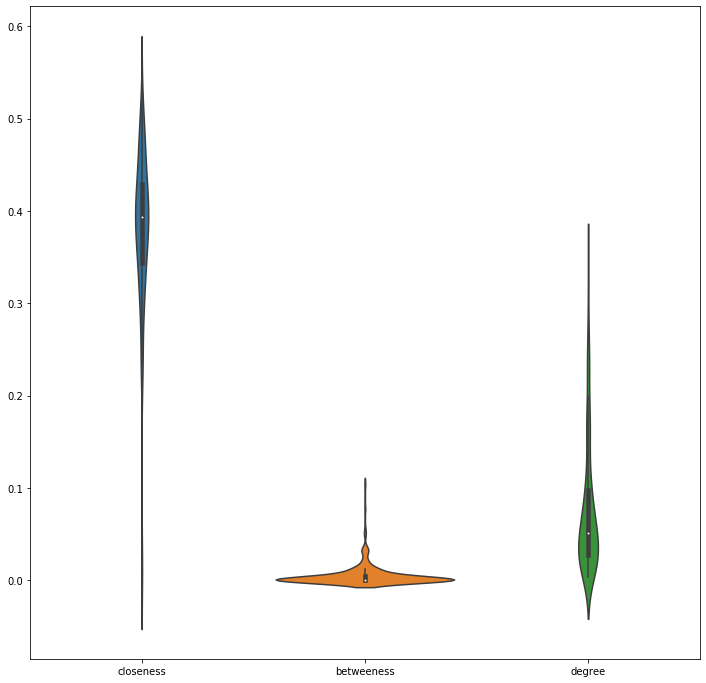

In [17]:
centrality_metrics = ('closeness', 'betweeness', 'degree')

plt.figure(3,figsize=(12,12)) 
sns.violinplot(x=[x for x in centrality_metrics for y in dolphins],
                   y=[centrality[str(y)][x] for x in centrality_metrics for y in dolphins]
                  )

In [18]:
ffs_closeness = np.quantile([centrality[str(dolphin)]["closeness"] for dolphin in dolphins], 
                           (0,0.25, 0.5, 0.75, 1))
ffs_betweeness = np.quantile([centrality[str(dolphin)]["betweeness"] for dolphin in dolphins], 
                           (0,0.25, 0.5, 0.75, 1))
ffs_degree = np.quantile([centrality[str(dolphin)]["degree"] for dolphin in dolphins], 
                           (0,0.25, 0.5, 0.75, 1))

print(ffs_closeness)
print(ffs_betweeness)
print(ffs_degree)

[0.00344828 0.34392203 0.39340308 0.42916726 0.53314472]
[0.         0.         0.00085667 0.00523156 0.10392713]
[0.00344828 0.02758621 0.05172414 0.09827586 0.34137931]


In [19]:
central_dolphins = list_overall_dolphins[0:5]
central_dolphins.append(list_closeness_dolphins[0])
central_dolphins.append(list_betweenness_dolphins[0])
central_dolphins.append(list_degree_dolphins[0])

central_dolphins = list(set(central_dolphins))
central_dolphins.sort()
display(central_dolphins)

['CRSC', 'IHWB', 'KKNK', 'LKWB', 'OLWB', 'SOCT']

In [20]:
# G = nx.GrAll()   # or DiGraph, MultiGraph, MultiDiGraph, etc

neighbours = list(GrAll.neighbors('CRSC'))
# display(neighbours)

In [21]:
networks = ['social', 'forage', 'travel']

# for network in networks:
#     print(network)
    
# for dolphin in central_dolphins:
#     print(dolphin)    

In [22]:
central_dolphin_count = [(dolphins_seen.count(dolphin), dolphin) for dolphin in central_dolphins]
print(central_dolphin_count)

[(20, 'CRSC'), (8, 'IHWB'), (3, 'KKNK'), (11, 'LKWB'), (20, 'OLWB'), (18, 'SOCT')]


In [23]:
networks = ['social', 'forage', 'travel']

central_neighborhoods ={}
# central_neighborhoods['CRSC'] = {}
# central_neighborhoods['CRSC']['social'] = list(GrAll.neighbors('CRSC'))

for dolphin in central_dolphins:
    central_neighborhoods[dolphin] = {}
    for network in networks:
        central_neighborhoods[dolphin][network] = list(GrAll.neighbors(dolphin))
                        

# print(central_neighborhoods)

# print(central_neighborhoods['KKNK']['social'])
# print(central_neighborhoods['KKNK']['forage'])
# print(central_neighborhoods['KKNK']['travel'])


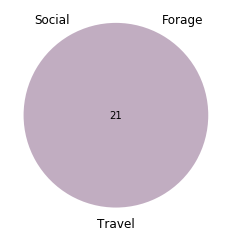

In [24]:

from matplotlib_venn import venn3, venn3_circles
v = venn3([set(central_neighborhoods['KKNK']['social']), 
           set(central_neighborhoods['KKNK']['forage']), 
          set(central_neighborhoods['KKNK']['travel'])], 
      set_labels = ('Social', 'Forage', 'Travel'))

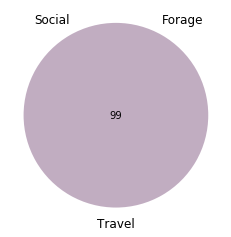

In [25]:
v = venn3([set(central_neighborhoods['CRSC']['social']), 
           set(central_neighborhoods['CRSC']['forage']), 
          set(central_neighborhoods['CRSC']['travel'])], 
      set_labels = ('Social', 'Forage', 'Travel'))

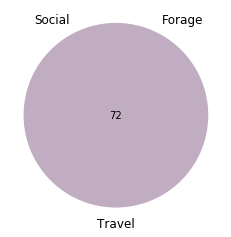

In [26]:
v = venn3([set(central_neighborhoods['IHWB']['social']), 
           set(central_neighborhoods['IHWB']['forage']), 
          set(central_neighborhoods['IHWB']['travel'])], 
      set_labels = ('Social', 'Forage', 'Travel'))

In [27]:

central_edges = [list(GrAll.edges(dolphin)) for dolphin in central_dolphins]
# central_edges = nx.GrAll.edges('IHWB')
#print(central_edges)
all_central_edges =[]

for edgelist in central_edges:
    all_central_edges = all_central_edges + edgelist
    
#print(all_central_edges)

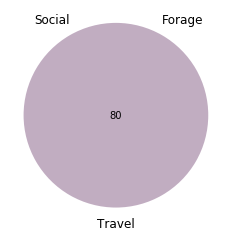

In [28]:
#LKWB
v = venn3([set(central_neighborhoods['LKWB']['social']), 
           set(central_neighborhoods['LKWB']['forage']), 
          set(central_neighborhoods['LKWB']['travel'])], 
      set_labels = ('Social', 'Forage', 'Travel'))

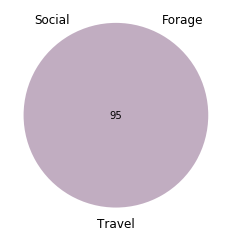

In [29]:
#OLWB
v = venn3([set(central_neighborhoods['OLWB']['social']), 
           set(central_neighborhoods['OLWB']['forage']), 
          set(central_neighborhoods['OLWB']['travel'])], 
      set_labels = ('Social', 'Forage', 'Travel'))

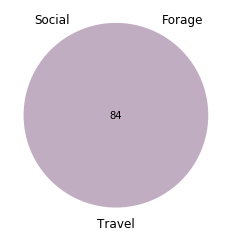

In [30]:
#SOCT
v = venn3([set(central_neighborhoods['SOCT']['social']), 
           set(central_neighborhoods['SOCT']['forage']), 
          set(central_neighborhoods['SOCT']['travel'])], 
      set_labels = ('Social', 'Forage', 'Travel'))

In [31]:
for dolphin in central_dolphins:
    display(dolphin, centrality[str(dolphin)])

'CRSC'

{'closeness': 0.5220585359494165,
 'betweeness': 0.05607821479813802,
 'degree': 0.3413793103448276,
 'closeness_rank': 2,
 'betweeness_rank': 3,
 'degree_rank': 3,
 'overall_rank': 1}

'IHWB'

{'closeness': 0.4967067725130241,
 'betweeness': 0.03410483482490568,
 'degree': 0.2482758620689655,
 'closeness_rank': 12,
 'betweeness_rank': 8,
 'degree_rank': 8,
 'overall_rank': 5}

'KKNK'

{'closeness': 0.42034850154831255,
 'betweeness': 0.10392713143437239,
 'degree': 0.07241379310344828,
 'closeness_rank': 88,
 'betweeness_rank': 1,
 'degree_rank': 1,
 'overall_rank': 22}

'LKWB'

{'closeness': 0.5048792788249385,
 'betweeness': 0.033883586384414036,
 'degree': 0.27586206896551724,
 'closeness_rank': 6,
 'betweeness_rank': 10,
 'degree_rank': 10,
 'overall_rank': 4}

'OLWB'

{'closeness': 0.5331447210757555,
 'betweeness': 0.03633684284167597,
 'degree': 0.3275862068965517,
 'closeness_rank': 1,
 'betweeness_rank': 6,
 'degree_rank': 6,
 'overall_rank': 3}

'SOCT'

{'closeness': 0.5142811275926283,
 'betweeness': 0.05114276681432285,
 'degree': 0.2896551724137931,
 'closeness_rank': 4,
 'betweeness_rank': 4,
 'degree_rank': 4,
 'overall_rank': 2}

C:\Users\Liam\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


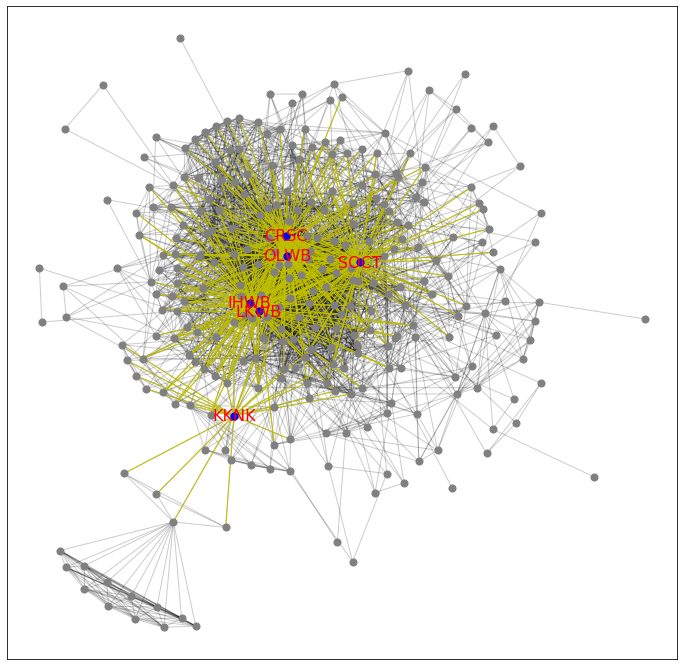

In [32]:

pos = nx.kamada_kawai_layout(GrAll)
plt.figure(3,figsize=(12,12)) 
nx.draw_networkx_nodes(GrAll, pos, fixed = True, with_labels=False, node_size = 50, 
                       node_color = '#808080', font_size = 6, alpha = 1)
nx.draw_networkx_nodes(GrAll, pos, fixed = True, with_labels=True, node_size = 50, 
                       node_color = 'b', font_size = 10, alpha = 1,
                       nodelist=central_dolphins)
nx.draw_networkx_edges(GrAll, pos, fixed = True, alpha = 0.2)
nx.draw_networkx_edges(GrAll, pos, edgelist = all_central_edges, fixed = True, edge_color = 'y', alpha = 1)

labels = {}  
for dolphin in dolphins:
    if dolphin in central_dolphins:
        #set the node name as the key and the label as its value 
        labels[dolphin] = dolphin

# fig, ax = plt.subplots(subplot_kw=dict(facecolor='#EEEEEE'))
# scatter = nx.draw_networkx_nodes(GrAll, pos)
        
# labels_all = GrAll.nodes()
# tooltip = mpld3.plugins.PointLabelTooltip(scatter, labels=labels_all)
# mpld3.plugins.connect(fig, tooltip)

# mpld3.show()

nx.draw_networkx_labels(GrAll, pos, labels, font_size=16,font_color='r')
plt.show()

**Social**

In [33]:
no_components_social = nx.number_connected_components(GrSocial)
display(no_components_social)

components_social = [len(comp) for comp in nx.connected_components(GrSocial)]
display(components_social)

nodes_social = [list(comp) for comp in nx.connected_components(GrSocial)]
#print(nodes_all)

main_social = nodes_social[0]
splinter_social = [dolphin for x in range(1,no_components_social)for dolphin in nodes_social[x] ]
print(splinter_social)

# diameter_all = nx.diameter(GrAll)
# print(diameter_all)

# all_connectivity = nx.node_connectivity(GrAll)
# display(all_connectivity)

2

[2, 149]

['UODC', 'MNSC', 'SDCR', 'SOCT', 'VGSK', 'GNSK', 'BEDI', 'AWWB', 'BGDI', 'VFIN', 'MISS', 'TBWB', 'CSSC', 'SSDI', 'UAOS', 'NTWB', 'SNCT', 'SUSS', 'JINK', 'MRCR', 'TOSC', 'MLSS', 'CASC', 'SYNK', 'NYSC', 'CPSC', 'SLDI', 'PTSK', 'GRSC', 'SDDI', 'SXNK', 'GESC', 'SESR', 'NHCT', 'PLNC', 'FNCT', 'SRWB', 'BJSC', 'BNDI', 'THWB', 'TCSS', 'MHWB', 'TESK', 'GYOS', 'SYSC', 'IEWB', 'BSNC', 'RKSS', 'FRWB', 'DPSC', 'ORWB', 'PNNC', 'DHDI', 'RPSC', 'DENK', 'MTDI', 'BPSK', 'HDSK', 'GLDR', 'STSC', 'NHWB', 'PPSC', 'LOSC', 'STDC', 'KLDI', 'NLSC', 'SHSC', 'SNDI', 'TLFN', 'BNDC', 'PEDI', 'BESK', 'LLSS', 'J6SS', 'DGDI', 'FYDC', 'FNCR', 'CBWB', 'BTDI', 'DEDI', 'BZNK', 'CRSC', 'TEOS', 'BEWB', 'VLSS', 'BWDI', 'FTSC', 'DDSC', 'RTDI', 'HTDI', 'GANC', 'CMDK', 'NSDK', 'NECF', 'INSC', 'MKSC', 'TDWB', 'TPSS', 'RDSS', 'BCSK', 'PTSC', 'VENK', 'WPDR', 'KSNC', 'BRSC', 'SEDI', 'PHSC', 'MODI', 'Y8SS', 'IODI', 'IHWB', 'SESC', 'RNWB', 'FESK', 'FKDI', 'HKNK', 'LPWB', 'NASC', 'J12C', 'BHNK', 'OLWB', 'SPSC', 'FRSK', 'FGSC', 'TBSC',

In [34]:
GrSocialMComp = nx.Graph() 
for (x, y) in social_edge_list:
    if x not in splinter_social:
        GrSocialMComp.add_node(x)
        GrSocialMComp.add_node(y)
        GrSocialMComp.add_edge(x, y)
    

display(f"GrSocialMComp has {GrSocialMComp.number_of_nodes()} of GrSocial's {GrSocial.number_of_nodes()} nodes")
display(f"GrSocialMComp has {GrSocialMComp.number_of_edges()} of GrSocial's {GrSocial.number_of_edges()} edges")


diameter_social = nx.diameter(GrSocialMComp)
display(f"GrSocialMComp has a diameter of {diameter_social}")

radius_social = nx.radius(GrSocialMComp)
display(f"GrSocialMComp has a radius of {radius_social}")

"GrSocialMComp has 2 of GrSocial's 151 nodes"

"GrSocialMComp has 1 of GrSocial's 1554 edges"

'GrSocialMComp has a diameter of 1'

'GrSocialMComp has a radius of 1'

'GrSocial has a maximum degree of 69'

'GrSocial has a mean degree of 20.582781456953644'

'GrSocial has a median degree of 15'

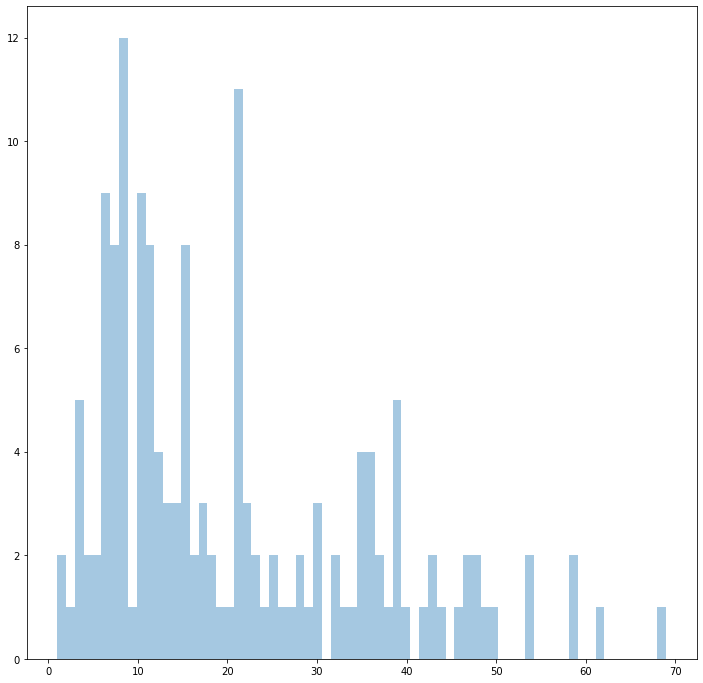

In [35]:
degree_social = [GrSocial.degree(dolphin) for dolphin in dolphins if dolphin in GrSocial]
max_degree_social = max(degree_social)

mean_degree_social = statistics.mean(degree_social)
median_degree_social = statistics.median(degree_social)

display(f"GrSocial has a maximum degree of {max_degree_social}")
display(f"GrSocial has a mean degree of {mean_degree_social}")
display(f"GrSocial has a median degree of {median_degree_social}")

plt.figure(3,figsize=(12,12)) 
sns.distplot(degree_social, bins=max_degree_social, hist=True, kde=False, rug=False)

71


"71 of GrSocial's 151 nodes (47.019867549668874%)have a cluster coefficient of 1"

'The graph GrSocial has an average cluster coefficient of 0.7882579347214447'

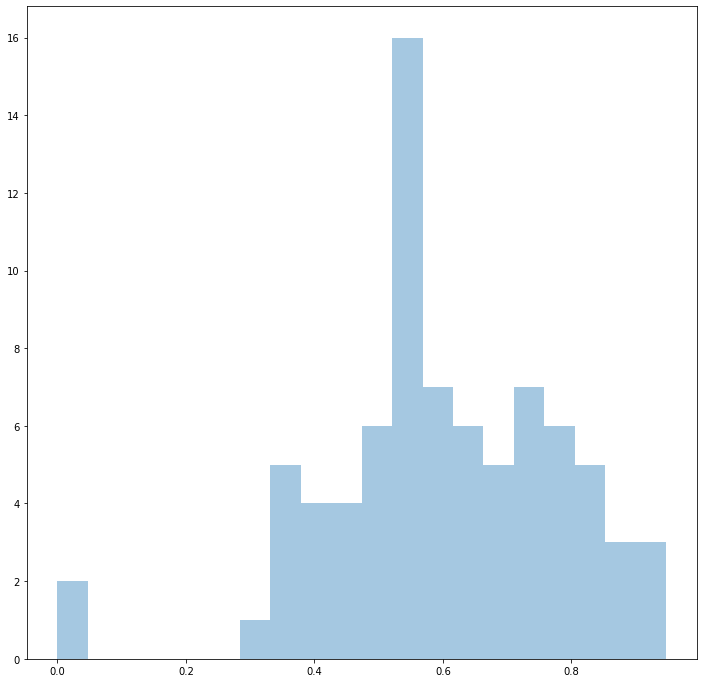

In [36]:
cluster_social = [nx.clustering(GrSocial, nodes = dolphin) for dolphin in dolphins if dolphin in GrSocial]
# print(cluster_social)

i = 0
for x in cluster_social:
    if x == 1:
        i = i+1
print(i)
pct = 100*i/GrSocial.number_of_nodes() 

cluster_social_disunity = [coef for coef in cluster_social if coef < 1]

display(f"{i} of GrSocial's {GrSocial.number_of_nodes()} nodes ({pct}%)have a cluster coefficient of 1")

av_cluster_social = nx.average_clustering(GrSocial)

display(f"The graph GrSocial has an average cluster coefficient of {av_cluster_social}")

plt.figure(3,figsize=(12,12)) 
sns.distplot(cluster_social_disunity, bins=20, hist=True, kde=False, rug=False)          
    

In [37]:
no_clique_social = nx.graph_number_of_cliques(GrSocial)
clique_no_social = nx.graph_clique_number(GrSocial)

display(f"The graph GrSocial has {no_clique_social} cliques, the largest of which contains {clique_no_social} dolphins")

'The graph GrSocial has 116 cliques, the largest of which contains 31 dolphins'

Forage

In [38]:
no_components_forage = nx.number_connected_components(GrForage)
display(no_components_forage)

components_forage = [len(comp) for comp in nx.connected_components(GrForage)]
display(components_forage)

nodes_forage = [list(comp) for comp in nx.connected_components(GrForage)]
#print(nodes_all)

main_forage = nodes_forage[0]
splinter_forage = [dolphin for x in range(1,no_components_forage)for dolphin in nodes_forage[x] ]
# print(splinter_forage)

# diameter_all = nx.diameter(GrAll)
# print(diameter_all)

# all_connectivity = nx.node_connectivity(GrAll)
# display(all_connectivity)

6

[176, 3, 4, 3, 2, 2]

In [39]:
GrForageMComp = nx.Graph() 
for (x, y) in forage_edge_list:
    if x not in splinter_forage:
        GrForageMComp.add_node(x)
        GrForageMComp.add_node(y)
        GrForageMComp.add_edge(x, y)
    

display(f"GrForageMComp has {GrForageMComp.number_of_nodes()} of GrForage's {GrForage.number_of_nodes()} nodes")
display(f"GrForageMComp has {GrForageMComp.number_of_edges()} of GrForage's {GrForage.number_of_edges()} edges")


diameter_forage = nx.diameter(GrForageMComp)
display(f"GrForageMComp has a diameter of {diameter_forage}")

radius_forage = nx.radius(GrForageMComp)
display(f"GrForageMComp has a radius of {radius_forage}")

"GrForageMComp has 176 of GrForage's 190 nodes"

"GrForageMComp has 1121 of GrForage's 1134 edges"

'GrForageMComp has a diameter of 7'

'GrForageMComp has a radius of 4'

'GrForage has a maximum degree of 47'

'GrForage has a mean degree of 11.936842105263159'

'GrForage has a median degree of 8.0'

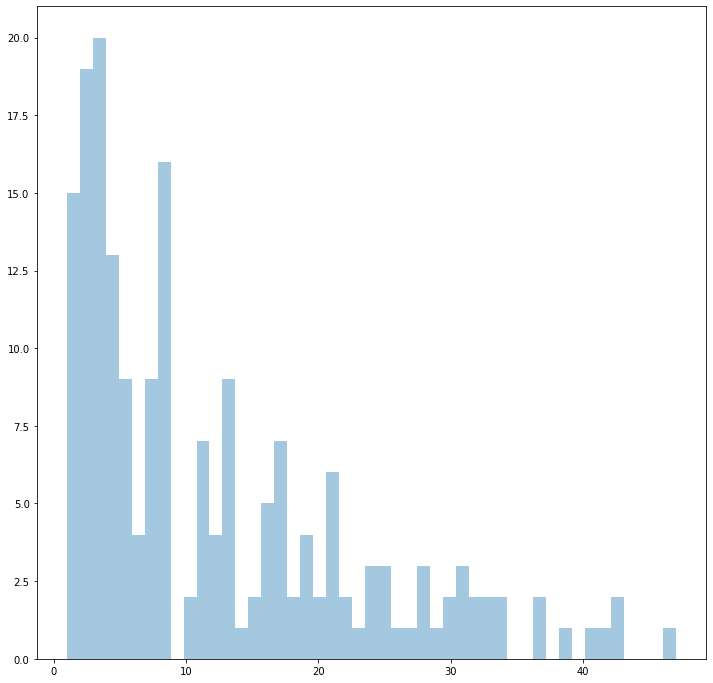

In [40]:
degree_forage = [GrForage.degree(dolphin) for dolphin in dolphins if dolphin in GrForage]
max_degree_forage = max(degree_forage)

mean_degree_forage = statistics.mean(degree_forage)
median_degree_forage = statistics.median(degree_forage)

display(f"GrForage has a maximum degree of {max_degree_forage}")
display(f"GrForage has a mean degree of {mean_degree_forage}")
display(f"GrForage has a median degree of {median_degree_forage}")

plt.figure(3,figsize=(12,12)) 
sns.distplot(degree_forage, bins=max_degree_forage, hist=True, kde=False, rug=False)

77


"77 of GrForage's 190 nodes (40.526315789473685%)have a cluster coefficient of 1"

'The graph GrForage has an average cluster coefficient of 0.6587530358006516'

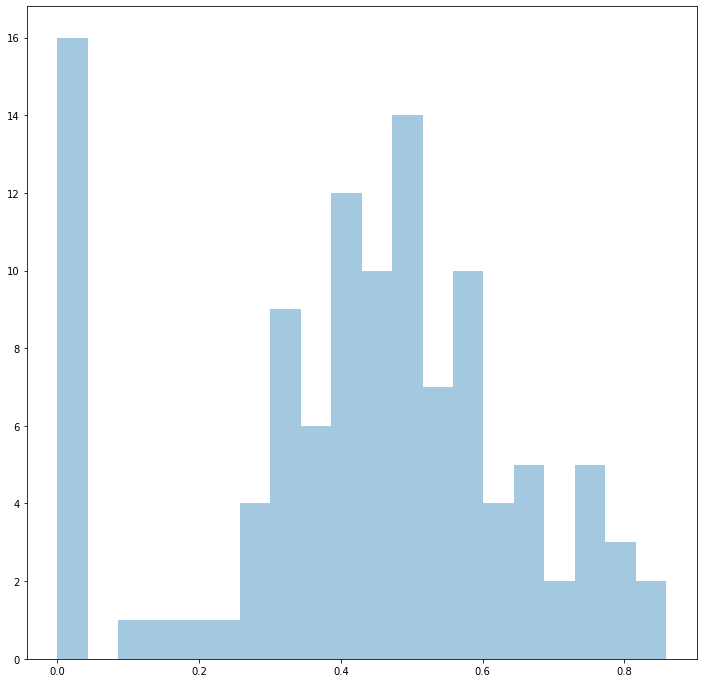

In [41]:
cluster_forage = [nx.clustering(GrForage, nodes = dolphin) for dolphin in dolphins if dolphin in GrForage]
# print(cluster_forage)

i = 0
for x in cluster_forage:
    if x == 1:
        i = i+1
print(i)
pct = 100*i/GrForage.number_of_nodes() 

cluster_forage_disunity = [coef for coef in cluster_forage if coef < 1]

display(f"{i} of GrForage's {GrForage.number_of_nodes()} nodes ({pct}%)have a cluster coefficient of 1")

av_cluster_forage = nx.average_clustering(GrForage)

display(f"The graph GrForage has an average cluster coefficient of {av_cluster_forage}")

plt.figure(3,figsize=(12,12)) 
sns.distplot(cluster_forage_disunity, bins=20, hist=True, kde=False, rug=False)

In [42]:
no_clique_forage = nx.graph_number_of_cliques(GrForage)
clique_no_forage = nx.graph_clique_number(GrForage)

display(f"The graph GrForage has {no_clique_forage} cliques, the largest of which contains {clique_no_forage} dolphins")

'The graph GrForage has 136 cliques, the largest of which contains 18 dolphins'

Travel

In [43]:
no_components_travel = nx.number_connected_components(GrTravel)
display(no_components_travel)

components_travel = [len(comp) for comp in nx.connected_components(GrTravel)]
display(components_travel)

nodes_travel = [list(comp) for comp in nx.connected_components(GrTravel)]
#print(nodes_all)

main_travel = nodes_travel[0]
splinter_travel = [dolphin for x in range(1,no_components_travel)for dolphin in nodes_travel[x] ]
# print(splinter_travel)

6

[157, 17, 4, 5, 3, 2]

In [44]:
GrTravelMComp = nx.Graph() 
for (x, y) in travel_edge_list:
    if x not in splinter_travel:
        GrTravelMComp.add_node(x)
        GrTravelMComp.add_node(y)
        GrTravelMComp.add_edge(x, y)
    

display(f"GrTravelMComp has {GrTravelMComp.number_of_nodes()} of GrTravel's {GrTravel.number_of_nodes()} nodes")
display(f"GrTravelMComp has {GrTravelMComp.number_of_edges()} of GrTravel's {GrTravel.number_of_edges()} edges")


diameter_travel = nx.diameter(GrTravelMComp)
display(f"GrTravelMComp has a diameter of {diameter_travel}")

radius_travel = nx.radius(GrTravelMComp)
display(f"GrTravelMComp has a radius of {radius_travel}")

"GrTravelMComp has 157 of GrTravel's 188 nodes"

"GrTravelMComp has 924 of GrTravel's 1032 edges"

'GrTravelMComp has a diameter of 7'

'GrTravelMComp has a radius of 4'

'GrTravel has a maximum degree of 43'

'GrTravel has a mean degree of 10.97872340425532'

'GrTravel has a median degree of 9.0'

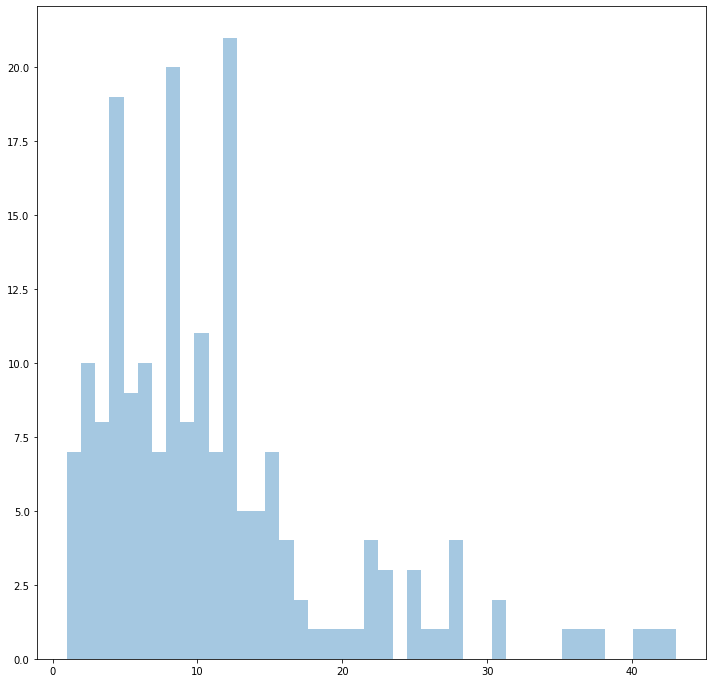

In [45]:
degree_travel = [GrTravel.degree(dolphin) for dolphin in dolphins if dolphin in GrTravel]
max_degree_travel = max(degree_travel)

mean_degree_travel = statistics.mean(degree_travel)
median_degree_travel = statistics.median(degree_travel)

display(f"GrTravel has a maximum degree of {max_degree_travel}")
display(f"GrTravel has a mean degree of {mean_degree_travel}")
display(f"GrTravel has a median degree of {median_degree_travel}")

plt.figure(3,figsize=(12,12)) 
sns.distplot(degree_travel, bins=max_degree_travel, hist=True, kde=False, rug=False)

88


"88 of GrTravel's 188 nodes (46.808510638297875%)have a cluster coefficient of 1"

'The graph GrTravel has an average cluster coefficient of 0.727745909291052'

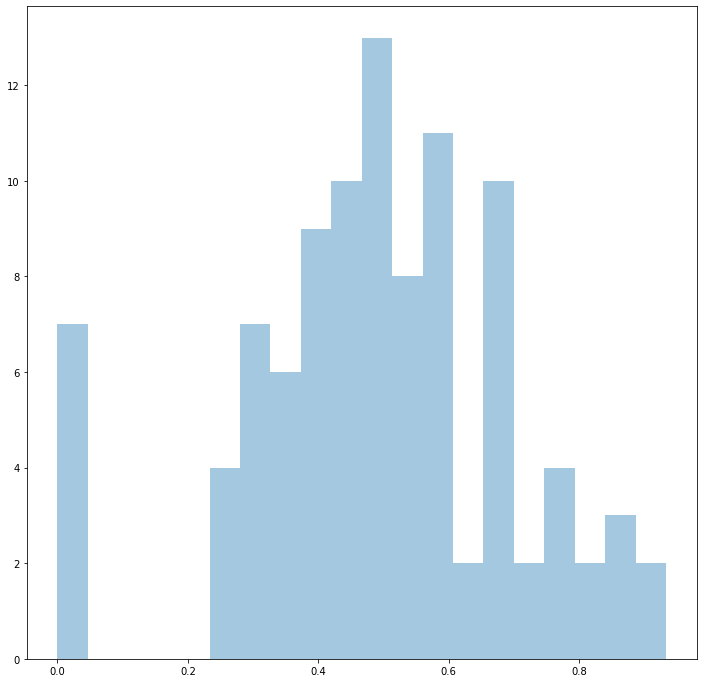

In [46]:
cluster_travel = [nx.clustering(GrTravel, nodes = dolphin) for dolphin in dolphins if dolphin in GrTravel]
# print(cluster_travel)

i = 0
for x in cluster_travel:
    if x == 1:
        i = i+1
print(i)
pct = 100*i/GrTravel.number_of_nodes() 

cluster_travel_disunity = [coef for coef in cluster_travel if coef < 1]

display(f"{i} of GrTravel's {GrTravel.number_of_nodes()} nodes ({pct}%)have a cluster coefficient of 1")

av_cluster_travel = nx.average_clustering(GrTravel)

display(f"The graph GrTravel has an average cluster coefficient of {av_cluster_travel}")

plt.figure(3,figsize=(12,12)) 
sns.distplot(cluster_travel_disunity, bins=20, hist=True, kde=False, rug=False)

In [47]:
no_clique_travel = nx.graph_number_of_cliques(GrTravel)
clique_no_travel = nx.graph_clique_number(GrTravel)

display(f"The graph GrTravel has {no_clique_travel} cliques, the largest of which contains {clique_no_travel} dolphins")

'The graph GrTravel has 131 cliques, the largest of which contains 16 dolphins'

**Considering Network Overlap**

In [48]:
dolphins_social = [node for node in GrSocial.nodes]
dolphins_forage = [node for node in GrForage.nodes]
dolphins_travel = [node for node in GrTravel.nodes]

print(type(dolphins_social))

<class 'list'>


In [49]:
dolphins_set = set(dolphins)
dolphins_social_set = set(dolphins_social)
dolphins_forage_set = set(dolphins_forage)
dolphins_travel_set = set(dolphins_travel)

print(len(dolphins_set))
print(len(dolphins_social_set))
print(len(dolphins_forage_set))
print(len(dolphins_travel_set))

291
151
190
188


In [50]:
dolphins_soc_for = dolphins_social_set.intersection(dolphins_forage_set) 
dolphins_for_tra = dolphins_forage_set.intersection(dolphins_travel_set) 
dolphins_tra_soc = dolphins_travel_set.intersection(dolphins_social_set) 

dolphins_tra_soc_for = dolphins_tra_soc.intersection(dolphins_forage_set) 

print(len(dolphins_soc_for))
print(len(dolphins_for_tra))
print(len(dolphins_tra_soc))
print(len(dolphins_tra_soc_for))

101
119
99
81


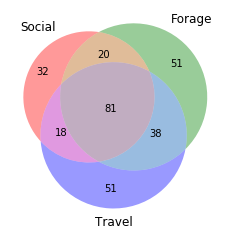

In [51]:


from matplotlib_venn import venn3, venn3_circles
v = venn3([dolphins_social_set, dolphins_forage_set, dolphins_travel_set], 
      set_labels = ('Social', 'Forage', 'Travel'))

In [52]:
check = 32 + 20 + 51 + 18 + 81 + 38 + 51
print(check)

dolphins_lost = [dolphin for dolphin in dolphins 
                 if dolphin not in dolphins_social
                 and dolphin not in dolphins_forage
                and dolphin not in dolphins_travel]

print(len(dolphins_lost))

291
0
